In [3]:
# Prevendo o nível de satisfação de cliente santander

# Preparando o ambiente e suas devidas ferramentas neste projeto

# Dados coletados do Kagggle- https://www.kaggle.com/c/santander-customer-satisfaction

In [7]:
# Importando pacotes

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mat
import warnings
warnings.filterwarnings('ignore')
%matplotlib in line



UsageError: unrecognized arguments: line


In [8]:
# carregando  os dataset

x_treino = pd.read_csv('treino.csv')
x_test = pd.read_csv('test.csv')

In [9]:
#analisando inicialmente o conjunto de dados

x_treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
x_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [11]:
#explorando variáveis
target = x_treino['TARGET']

In [12]:
# Observando os valores
target.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [13]:
# verificando o percentual na variável

print((3008/(73012+3008))*100)

3.9568534596158904


In [14]:
# Carregando pacotes de visualização
import seaborn as sns
from sklearn import metrics

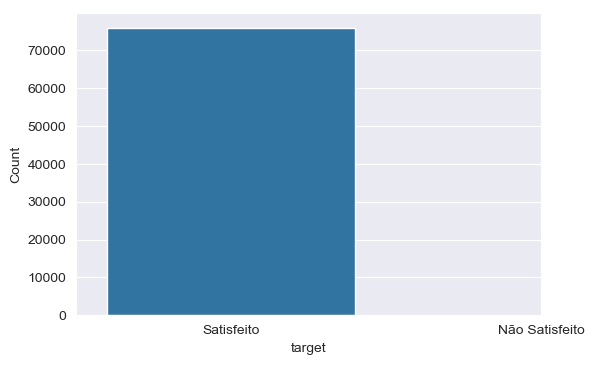

In [15]:
# visualizando
plt.figure(dpi=100)
sns.set_style('darkgrid')
sns.countplot(target, data = target)
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks([0,1],['Satisfeito', 'Não Satisfeito'])
plt.show()

In [16]:
#removendo linhas e colunas dispensáveis no Dataset(Dropagem)
x_treino.drop(labels = ['TARGET'], axis=1, inplace = True)

In [17]:
x_treino.shape, x_test.shape

((76020, 370), (75818, 370))

In [18]:
# Verificando a presença de valores Missing
x_treino.isnull() . sum() . any()

False

In [19]:
#usando sklearn variancethreshold para encontrar características constantes
# Este ajuste encontra os recursos com variação zero
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(x_treino)

VarianceThreshold(threshold=0.01)

In [20]:
# get_support é um vetor booleano que indica quais recursos são retidos
# se somarmos get_support, obtemos o número de recursos que não são constantes
sum(sel.get_support())

273

In [21]:
#  Agora vamos encontrar recursos não constantes
len(x_treino.columns[sel.get_support()])

273

In [22]:
constant_columns = [column for column in x_treino.columns
                   if column not in x_treino.columns[sel.get_support()]]
print(len(constant_columns))

97


In [23]:
for column in constant_columns:
    print(column)

ind_var1
ind_var2_0
ind_var2
ind_var6_0
ind_var6
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33
ind_var34_0
ind_var34
ind_var40
ind_var41
ind_var39
ind_var44_0
ind_var44
ind_var46_0
ind_var46
num_var6_0
num_var6
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var29_0
num_var29
num_var33
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
ind_var7_emit_ult1
ind_var7_recib_ult1
num_var2_0_ult1
num_var2_ult1
num_aport_var33_hace3
num_aport_var33_ult1
num_var7_emit_ult1
num_compra_var44_hace3
num_meses_var

In [24]:
constant_columns

['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb

In [25]:
x_treino[['ind_var1', 'ind_var2']]

,ind_var1,ind_var2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [26]:
x_treino = x_treino.drop(constant_columns,axis=1)


In [27]:
x_treino.shape

(76020, 273)

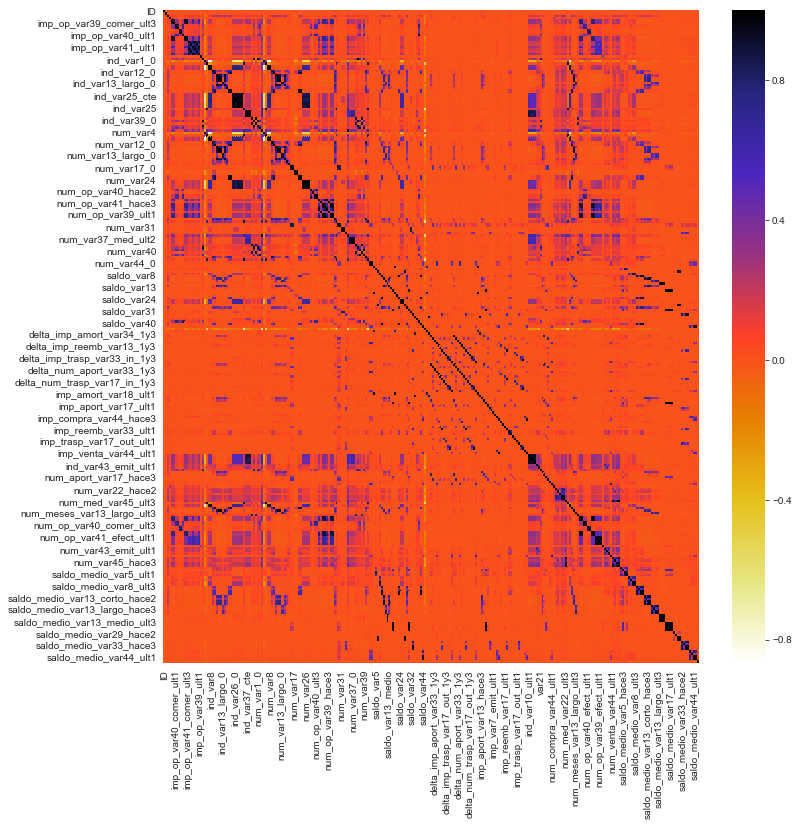

In [28]:
# 2: Feature Selection- verificando a correlação
# usando Pearson Correlação

import matplotlib.pyplot as plt
import seaborn as sns


corrmat = x_treino.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrmat,cmap="CMRmap_r")

In [29]:
# com a função a seguir, podemos selecionar recursos altamente correlacionados
# irá remover o primeiro recurso que está correlacionado com qualquer outro recurso
# estamos interessados no valor coeficiente absoluto

def correlation(dataset, threshold):
    col_corr = set()                    # Conjunto de todos os nomes de colunas correlacionadas
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr         
    

In [30]:
corr_features = correlation(x_treino, 0.98)
len(set(corr_features))

68

In [31]:
corr_features

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_reemb_var33_ult1',
 'imp_trasp_var33_out_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var25',
 'ind_var26',
 'ind_var37',
 'ind_var40_0',
 'ind_var41_0',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var12',
 'num_var13_corto',
 'num_var13_corto_0',
 'num_var1_0',
 'num_var24',
 'num_var24_0',
 'num_var25',
 'num_var26',
 'num_var32',
 'num_var35',
 'num_

In [32]:
x_treino = x_treino.drop(corr_features, axis=1)

In [33]:
x_treino.shape

(76020, 205)

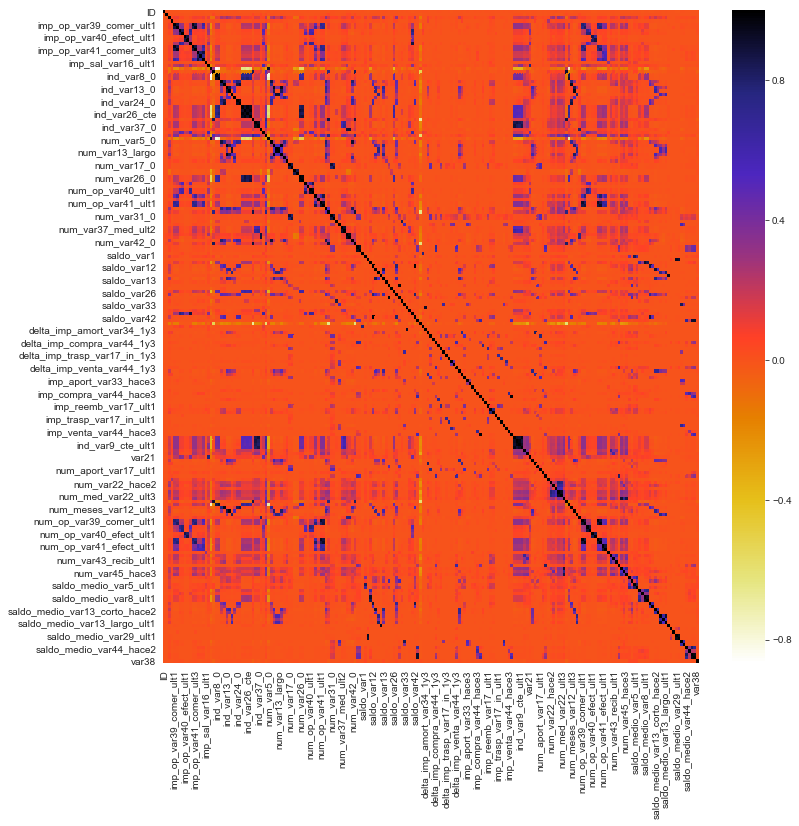

In [34]:

corrmat = x_treino.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corrmat,cmap="CMRmap_r")

In [35]:
# Feature Scaling( Dimensionamento de Recursos)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_treino = pd.DataFrame(scaler.fit_transform(x_treino), columns = x_treino.columns)


# x_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [36]:
x_treino.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,-1.735043,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.427183
1,-1.734997,0.039074,0.060753,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.372038
2,-1.734974,0.039074,-0.788249,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.273191
3,-1.734883,0.039074,0.292298,-0.053388,0.361427,0.138158,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,-0.291398
4,-1.734837,0.039074,0.446662,-0.053388,-0.213263,-0.218813,-0.038206,-0.042103,-0.013493,-0.015538,...,-0.003627,-0.004875,-0.005854,-0.017408,-0.011979,-0.01565,-0.012576,-0.018817,-0.019847,0.000412


In [37]:
print((x_treino.shape, target.shape))

((76020, 205), (76020,))


In [38]:
from sklearn.model_selection import train_test_split as tts
x_treino,x_test,y_treino,y_test=tts(x_treino,target,test_size=0.80,random_state=0,stratify=target)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_treino, y_treino)
y_pred = logreg.predict(x_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.9593


In [40]:
# Utilizando PCA
from sklearn.decomposition import PCA
pca = PCA()
x_treino = pca.fit_transform(x_treino)
pca.explained_variance_ratio_

array([8.42918459e-02, 6.32536490e-02, 5.73762554e-02, 4.16099737e-02,
       3.69878169e-02, 3.63256313e-02, 3.41269183e-02, 3.39925515e-02,
       2.63611443e-02, 2.46587855e-02, 2.35775700e-02, 2.27163062e-02,
       2.24663619e-02, 2.17528715e-02, 2.09906242e-02, 2.06210529e-02,
       2.01557632e-02, 1.94706840e-02, 1.84356948e-02, 1.74504557e-02,
       1.65277341e-02, 1.52487283e-02, 1.47836276e-02, 1.45550404e-02,
       1.42736826e-02, 1.29568320e-02, 1.16409539e-02, 1.12171806e-02,
       9.60874221e-03, 8.71541475e-03, 8.53466911e-03, 8.18688396e-03,
       7.70263267e-03, 7.13120096e-03, 6.66730760e-03, 6.24629839e-03,
       6.11355404e-03, 6.03224594e-03, 5.78700601e-03, 5.58932481e-03,
       5.40279900e-03, 5.15595157e-03, 4.99168187e-03, 4.81249076e-03,
       4.55144916e-03, 4.45741570e-03, 4.38926475e-03, 4.10517431e-03,
       4.02286030e-03, 3.85437684e-03, 3.71862940e-03, 3.61320922e-03,
       3.49057735e-03, 3.35198288e-03, 3.25542290e-03, 3.14974183e-03,
      

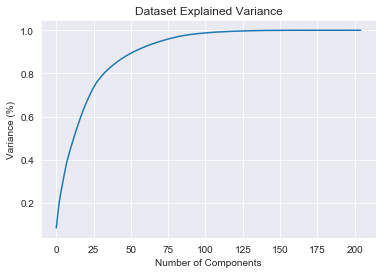

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca_resampled_test = PCA().fit(x_treino)

# plotar a soma cumulativa da variância explicada para o número diferente de componentes

plt.figure()
plt.plot(np.cumsum(pca_resampled_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [42]:
# Instanciando o PCA
pca = PCA(n_components=150)



In [43]:
#Fit PCA
principalComponents = pca.fit_transform(x_treino)

In [44]:
train_pc = pd.DataFrame(data = principalComponents)
train_target = pd.Series(target, name='TARGET')

train_pc_df = pd.concat([train_pc, train_target], axis=1)
train_pc_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,TARGET
0,-1.373058,-0.097433,0.149573,0.007922,0.274390,0.011172,0.162496,-0.147240,-0.497359,0.860573,...,0.010635,-0.003409,-0.002915,0.006830,0.009973,-0.000726,-0.000983,-0.000893,0.003261,0
1,-1.612331,-0.234147,0.329109,-0.026048,0.268388,0.012843,0.173695,-0.151643,-0.406372,0.802942,...,0.006279,0.003634,-0.000487,0.001407,0.002922,-0.007763,-0.002939,-0.001904,0.001247,0
2,4.114834,11.107229,-12.010369,-0.190464,-12.607665,0.784108,8.389707,-4.620418,-5.491619,-1.288988,...,-0.031852,0.010084,0.089177,-0.101487,-0.444660,-0.051549,0.003947,-0.048820,0.015807,0
3,4.074906,-0.058418,0.039672,0.473020,2.738124,0.197598,1.670244,-0.489019,-1.048477,1.124953,...,0.017724,0.027850,0.010316,-0.083629,0.076261,-0.077282,-0.007285,-0.069777,0.010141,0
4,-2.605414,-0.529056,0.865425,-0.171534,-0.757780,-0.037442,-0.552180,0.218293,0.987462,-1.463067,...,-0.000837,-0.000548,0.004833,0.000765,-0.002536,0.002713,-0.001544,-0.000346,-0.001757,0


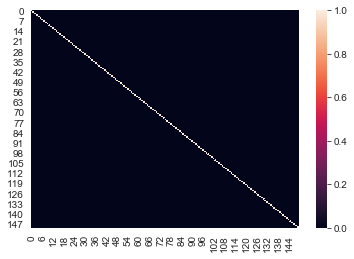

In [45]:
sns.heatmap(train_pc.corr());

In [46]:
#Regressão logística após aplicação de PCA
train_pc_df.shape , train_target.shape

((76020, 151), (76020,))

In [47]:
from sklearn.model_selection import train_test_split as tts
x_treino,x_test,y_treino,y_test=tts(train_pc_df,train_target,test_size=0.80,random_state=0,stratify=train_target)

In [66]:
logreg = LogisticRegression()
print('Logistic Regression accuracy score with the first 150 features: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first 150 features: 0.96
